# Packages

In [80]:
library(tidyverse)
library(janitor)
library(GGally)
library(tidyr)
library(reshape2)
library(Hmisc)

# Data dictionary 

![]("images/data_dictionary.png")

# Load data

In [81]:
raw_data  <- read.table("raw_data/student-mat.csv", sep= ";", header=TRUE) %>% clean_names()

In [82]:
glimpse(raw_data)

Rows: 395
Columns: 33
$ school     <chr> "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP",…
$ sex        <chr> "F", "F", "F", "F", "F", "M", "M", "F", "M", "M", "F", "F",…
$ age        <int> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15,…
$ address    <chr> "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U",…
$ famsize    <chr> "GT3", "GT3", "LE3", "GT3", "GT3", "LE3", "LE3", "GT3", "LE…
$ pstatus    <chr> "A", "T", "T", "T", "T", "T", "T", "A", "A", "T", "T", "T",…
$ medu       <int> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3, 4,…
$ fedu       <int> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3,…
$ mjob       <chr> "at_home", "at_home", "at_home", "health", "other", "servic…
$ fjob       <chr> "teacher", "other", "other", "services", "other", "other", …
$ reason     <chr> "course", "course", "other", "home", "home", "reputation", …
$ guardian   <chr> "mother", "father", "mother", "mother", "father", "mother",…
$ traveltime <int>

In [83]:
summary(raw_data)

    school              sex                 age         address         
 Length:395         Length:395         Min.   :15.0   Length:395        
 Class :character   Class :character   1st Qu.:16.0   Class :character  
 Mode  :character   Mode  :character   Median :17.0   Mode  :character  
                                       Mean   :16.7                     
                                       3rd Qu.:18.0                     
                                       Max.   :22.0                     
   famsize            pstatus               medu            fedu      
 Length:395         Length:395         Min.   :0.000   Min.   :0.000  
 Class :character   Class :character   1st Qu.:2.000   1st Qu.:2.000  
 Mode  :character   Mode  :character   Median :3.000   Median :2.000  
                                       Mean   :2.749   Mean   :2.522  
                                       3rd Qu.:4.000   3rd Qu.:3.000  
                                       Max.   :4.000   Max.   :

# Clean data

In [84]:
clean_data  <-  
    raw_data  %>% 
        # Transform chr type to factor
         mutate(across(where(is.character), as.factor)) %>% 
        # Remove G1 G2
        select(-c(g1,g2))  

head(clean_data,5)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,g3
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,no,no,4,3,4,1,1,3,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,yes,no,5,3,3,1,1,3,4,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,yes,no,4,3,2,2,3,3,10,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,yes,yes,3,2,2,1,1,5,2,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,no,no,4,3,2,1,2,5,4,10


Warning message in ggcorr(clean_data):
“data in column(s) 'school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' are not numeric and were ignored”


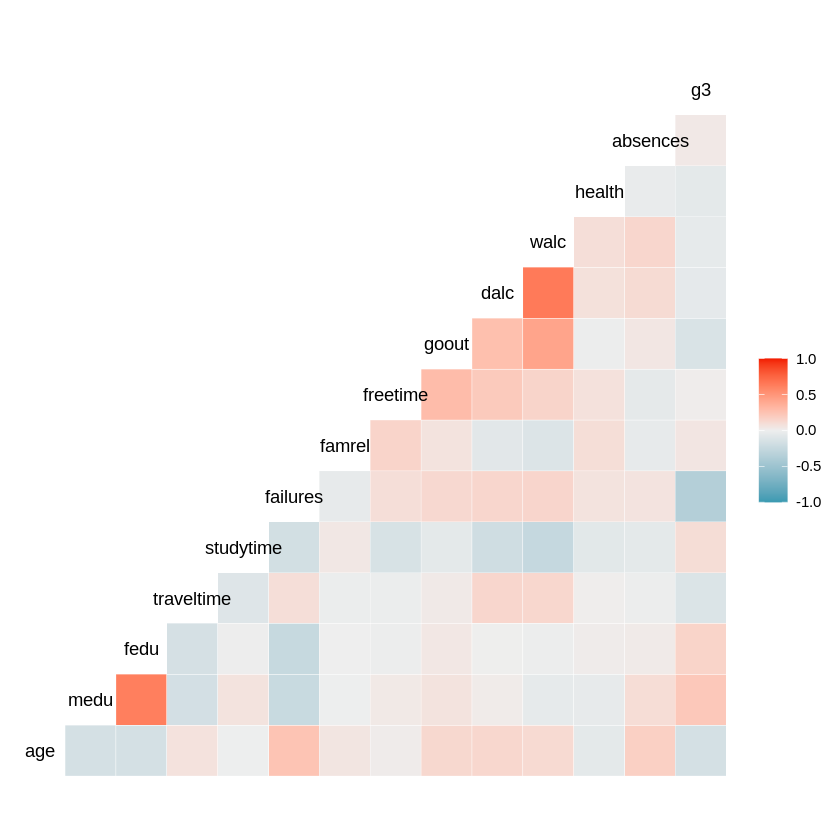

In [85]:
ggcorr(clean_data)

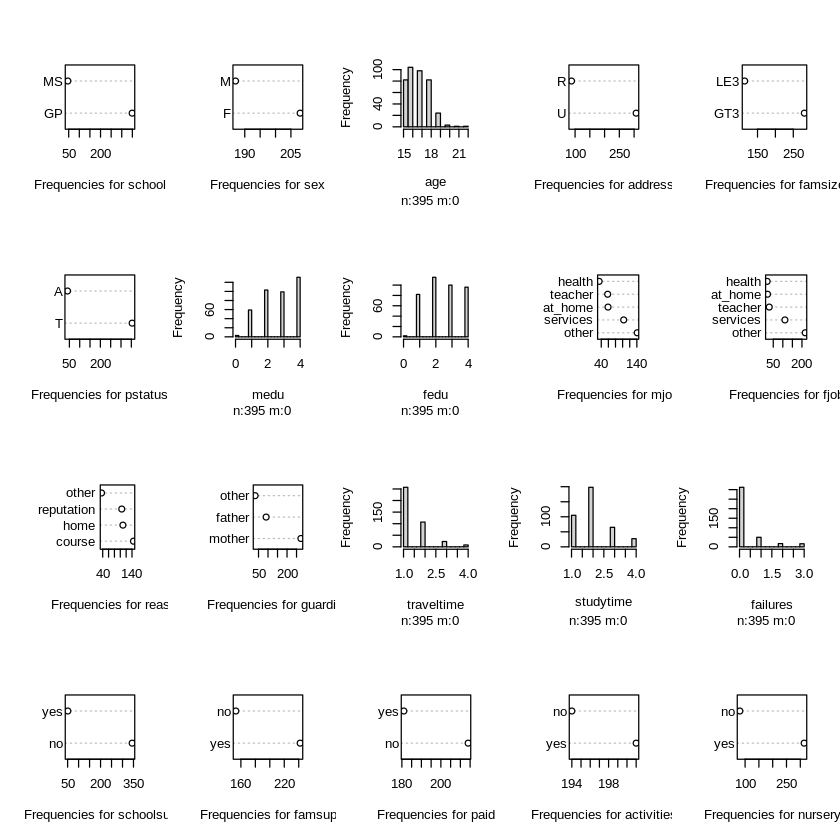

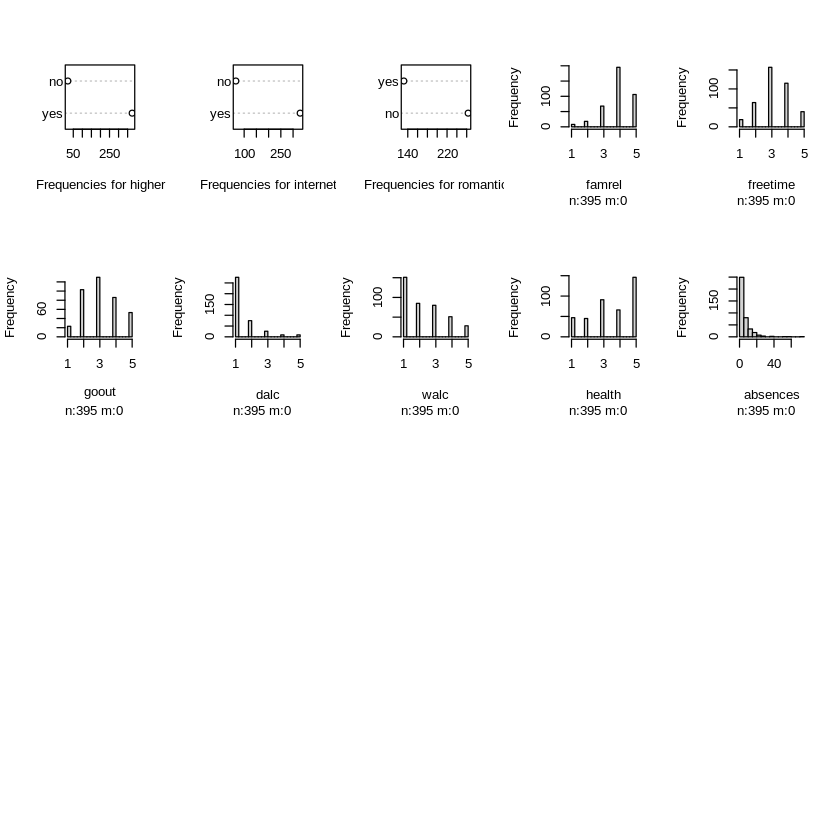

In [93]:
predictors  <- clean_data[,-ncol(clean_data)]
hist.data.frame(predictors)